In [7]:
# Standard
import os
import sys

# Third-party
import numpy as np

# Locals
folder_path = "/home/jiaxiangyi/Documents/F3DASM/src"
sys.path.insert(0, folder_path)
import f3dasm
from f3dasm.design import ExperimentData
from f3dasm.simulation.cases.flower_rve import FlowerRVE
from matplotlib import pyplot as plt 

In [4]:
N = 2  # number of samples

# define the doe
C1 = f3dasm.ContinuousParameter(
    name="C1", lower_bound=0.05, upper_bound=0.3
)
C2 = f3dasm.ContinuousParameter(
    name="C2", lower_bound=0.05, upper_bound=0.3
)
# define the output
stress = f3dasm.ContinuousParameter(name="stress")
strain = f3dasm.ContinuousParameter(name="strain")

design = f3dasm.DesignSpace(
    input_space=[C1, C2], output_space=[stress, strain]
)

sampler = f3dasm.sampling.LatinHypercube(design=design, seed=1)
data = sampler.get_samples(numsamples=N)
print(data.data)

      input           output       
         C1        C2 stress strain
0  0.102128  0.212792    NaN    NaN
1  0.175014  0.140041    NaN    NaN


In [5]:
# initialize the simulation
problem = FlowerRVE()
problem.update_sim_info(print_info=True)

Simulation information: 

{
    "job_name": "flower_rve",
    "MAT_Name": "Arruda",
    "C1": 0.2,
    "C2": 0.1,
    "platform": "ubuntu"
}


In [6]:
results = problem.run_f3dasm(data=data)
print(results.data)

 /home/jiaxiangyi/Documents/F3DASM/src/f3dasm/simulation/cases/flower_rve.py:92: FutureWarning:Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.


/home/jiaxiangyi/Documents/F3DASM/notebooks/tutorials/Data/case_0
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<6 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :25.004507 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<6 out of 30 licenses remain available>.
 /home/jiaxiangyi/Documents/F3DASM/src/f3dasm/simulation/cases/flower_rve.py:100: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/home/jiaxiangyi/Documents/F3DASM/notebooks/tutorials/Data/case_1
##################################################
############ start abaqus simulation ############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<6 out of 30 licenses remain available>.



*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

simulation time :25.001108 s
##################################################
############## abaqus post analysis ##############
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<6 out of 30 licenses remain available>.


      input                                                       output  \
         C1        C2                                             stress   
0  0.102128  0.212792  [[[0.0, 0.0], [0.0, 0.0]], [[1.808772329081546...   
1  0.175014  0.140041  [[[0.0, 0.0], [0.0, 0.0]], [[1.817887701920656...   

                                                      
                                              strain  
0  [[[0.0, 0.0], [0.0, 0.0]], [[0.006228170242272...  
1  [[[0.0, 0.0], [0.0, 0.0]], [[0.006228170242272...  


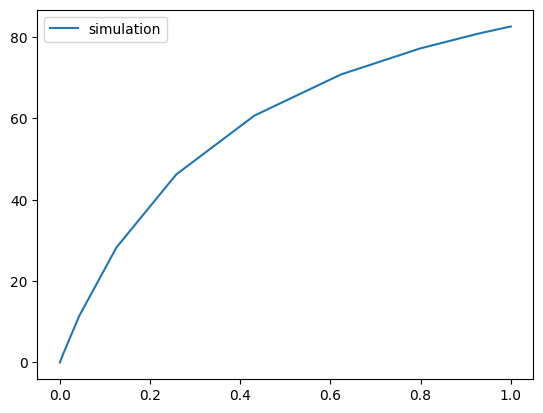

In [15]:
fig, ax = plt.subplots()
ax.plot(results.data[('output','strain')][0][:,0,0], results.data[('output','stress')][0][:,0,0], label='simulation')
ax.legend()
plt.show()

In [14]:
results.data[('output','strain')][0][:,0,0]

array([0.        , 0.00622817, 0.04292753, 0.12557911, 0.25790675,
       0.43130934, 0.62302648, 0.79941865, 0.92708686, 0.98910747,
       0.99999933])